In [1]:
import os 

In [1]:
import numpy as np
import sklearn
import pandas as pd

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('./dataSet/train.csv')

In [3]:
X = df.drop(['f_27', 'target'], axis= 1)
y = df.target
print('Class Label :', np.unique(y))

Class Label : [0 1]


In [4]:
#to evaluate how well trained model performs on unseen data 

#split data to taining and testing datase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1, stratify = y )
#stratification helps in splitting dataset depending on the target proportion

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

In [5]:
#scaling 
from sklearn.preprocessing import  StandardScaler  
sc = StandardScaler() #loading the standard scaler object
sc.fit(X_train) #using fit estimated the mean and sigma
X_train_std = sc.transform(X_train) # standardised the data using the parameters
X_test_std = sc.transform(X_test) #used the same parameter to standadrdise the test data
#so that both valuess are in training and test dataset are comparable

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [14]:
#loading perceptron from sklearn lib
from sklearn.linear_model import  Perceptron
ppn = Perceptron(n_iter = 40, eta0= 0.1, random_state= 1)
ppn.fit(X_train_std, y_train)

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
y_pred = ppn.predict(X_test_std)

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [16]:
print('Misclassified samples : %d ' % ((y_test != y_pred).sum()))

Misclassified samples : 124420 


In [17]:
y_test.shape

(270000,)

In [24]:
print('Error :', 124420/270000)
print ('Accuracy : 1- error = ' , 1-0.4608148148148148 )

Error : 0.4608148148148148
Accuracy : 1- error =  0.5391851851851852


In [25]:
#let's check the accuacy from the metric
from sklearn.metrics import accuracy_score
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))

Accuracy : 0.54


In [26]:
# score = predict & accuracy score

In [27]:
# running the logreg through the adaline method. 
class LogisticRegressionGD(object):
    """ Adaline Classifier
    Parameters:
    eta : float 
    Learning rate btwn 0.0 1.0
    random_state : initalisation seed
    n_iter : int
    passes over training dataset
    shuffle : shuffles training data every epoch if true to prevent cycles
    radom_state : int

    Attributes : 
    w_ : single array random generated
    cost_ : list
    logstic value in each epoch 
    """
   
    def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter #of epochs
        self.random_state = random_state

    def fit(self, X, y):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1] )
        self.cost_ = []
        for i in range (self.n_iter):
            net_input = self.net_input(X) #dimention n*1
            output = self.activation(net_input)  #dimention n*1
            errors = y - output # y dimention n*1 , error dimention = n*1
            self.w_[1:] += self.eta* X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
            
        return self
    def net_input(self, X):
        """ net input = w'.x 
        where self.w_[0] is the bias  also refered as the activation
        """
        return np.dot(X, self.w_[1:]) + self.w_[0] # w - dimension p*1 
# x - dimension n*p ; net_input = z simention = n*1 
   
    def activation(self, z):
        "Compute linear activation"
        return 1./(1 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    



In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( C = 100, random_state= 1)
lr.fit(X_train_std, y_train)

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
X_combined_std  = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [54]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions (X, y, classifier , test_idx = None, resolution = 0.02):
    #setup marker generator and color map

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
#plot decision surface
#x1_min, x1_max = X[:,:].min()-1, X[:,:].max()+1 
#x2_min, x2_max = X[:,:].min()-1, X[:,:].max()+1 
#xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02) )
#lab = lr.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#lab = lab.reshape(xx1.shape)
#    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
#    plt.xlim(xx1.min(), xx1.max())
#    plt.ylim(xx2.min(), xx2.max())
    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_train_std[y_train == cl, 1], 
                    y=X_train_std[y_train == cl, 2],
                    alpha=0.3, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    #highlight test examples
    if test_idx:
        # plot all examples
    
        X_test, y_test = X[105:150, :], y[105:150]

        plt.scatter(X_test[:, 1],
                X_test[:, 2],
                c='none',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100, 
                label='Test set')        


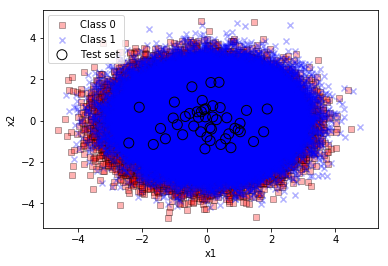

In [56]:
plot_decision_regions(X_combined_std, y_combined, classifier= lr, test_idx=range(105,150))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

* probability that certain training example belonng to certain class can be computed :
* the first and second number can be summed to = 1

In [58]:
lr.predict_proba(X_test_std[:, :])

array([[0.4280207 , 0.5719793 ],
       [0.64496949, 0.35503051],
       [0.66754545, 0.33245455]])

In [59]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis = 1)

array([1, 0, 0])

In [60]:
lr.predict(X_test_std[:3,:])

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1, 0, 0])

## C - Regularization in LogReg == L2 regulatiaq5ion 
* to penalise the extreme parameter (weight)
Logistc Regression (C = ) C - paramreter = inverse of regulrization .
* can control how well we fit the data by keeping weights small.  == 

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

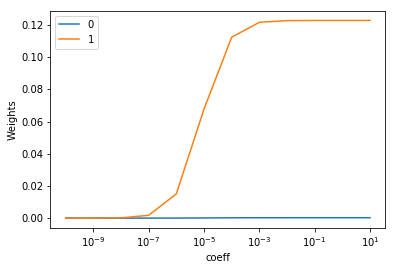

In [72]:
weights, params =[], []
for c in np.arange(-10, 2):
    lr = LogisticRegression(C = 10.**c, random_state= 1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0]) # to obtain weight of each feature
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label = '0')
plt.plot(params, weights[:,1], label = '1')
plt.ylabel('Weights')
plt.xlabel('coeff')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()


the weight coefficient shrinks if decrease C= regularization strength

In [66]:
x = lr.coef_ 

array([ 9.06787051e-05,  6.77635968e-02,  6.67859945e-02,  3.70700213e-02,
       -4.42198584e-03, -1.36807055e-03,  3.69493329e-02, -2.22031583e-03,
       -2.20813774e-03,  3.92919455e-02,  8.46061319e-02, -3.61104996e-02,
       -9.54382274e-02,  1.58583442e-03, -4.07749508e-02, -2.15830737e-02,
        5.04877885e-02, -5.48598298e-02,  8.43472065e-03, -1.26653882e-02,
       -1.01219948e-01, -5.56847986e-02,  1.60596906e-01,  9.10235739e-02,
        8.70235497e-02,  9.76809817e-02, -3.02719680e-02,  6.37282632e-02,
        1.79405167e-02,  7.75404220e-02,  4.91192954e-02])